# Risk and Profit Assessment in the Oil Industry

## Introduction

### Project overview

Our focus on this project is to help the mining company Oleobrás find the best location to drill a new oil well. For this, parameters related to oil quality and the volume of reserves in each region will be collected. Then, a model will be built to predict the volume of reserves in the new wells. Based on these forecasts, the wells with the highest estimated values will be selected. Finally, the region that offers the highest total profit considering the selected oil wells will be chosen. The Bootstrapping technique will be used to analyze the potential profit and the risks involved.

### Project objectives

Let's create a Machine Learning model that will help choose the region with the highest profit margin and use the Bootstrapping technique to analyze potential profit and risks.

### Data description

The geological exploration data for the three regions is stored in **three different files**:

   * `geo_data_0.csv`
   
   
   * `geo_data_1.csv`
   
   
   * `geo_data_2.csv`
   
Each file has the same columns, separated into:

   * `id`: unique oil well identifier
   
   
   * `f0`, `f1` and `f2`: three point characteristics (their specific meaning is not important, but the characteristics themselves are significant)
   
   
   * `product`: volume of reserves in the oil well (thousands of barrels).

## Data preparation

### Importing Libraries

We will keep here the import of all the necessary libraries for this work:

In [149]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Data collection

Let's import the databases so we can analyze and work with them:

In [150]:
# Importing the databases
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

### Initial data exploration

For each database in each region, we'll view the first rows, their basic information (column names, datatypes and Dataframe size) and compare their initial statistics:

#### Exploring `df0`

In [151]:
# Viewing the first lines of 'df0'
df0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [152]:
# Analyzing the number of columns and their names, data types, missing values and number of rows
df0.info()
print('Number of duplicates:', df0.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


In [153]:
# Analyzing the initial statistics of 'df0'
df0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


#### Exploring `df1`

In [154]:
# Viewing the first lines of 'df1'
df1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [155]:
# Analyzing the number of columns and their names, data types, missing values and number of rows
df1.info()
print('Number of duplicates:', df1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


In [156]:
# Analyzing the initial stats of 'df1'
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


#### Exploring `df2`

In [157]:
# Viewing the first lines of 'df2'
df2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [158]:
# Analyzing the number of columns and their names, data types, missing values and number of rows
df2.info()
print('Number of duplicates:', df1.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Number of duplicates: 0


In [159]:
# Analyzing the initial stats of 'df2'
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


#### Comparison between regions

Let's plot two graphs that help us visualize the differences between these regions:

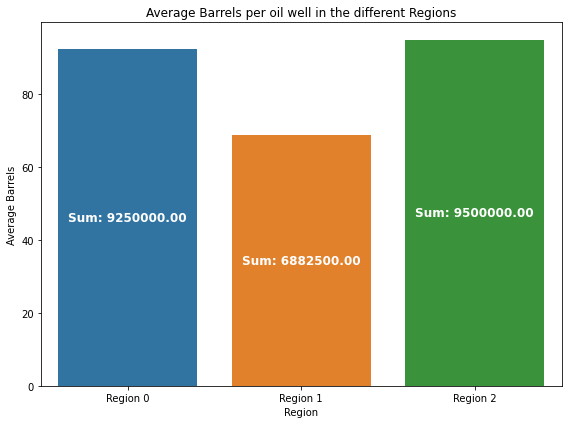

In [160]:
# Dataframe with average barrels per region
mean_data = pd.DataFrame({
    'Region': ['Region 0', 'Region 1', 'Region 2'],
    'Average Barrels': [df0['product'].mean(), df1['product'].mean(), df2['product'].mean()],
    'Total Sum of Barrels': [df0['product'].sum(), df1['product'].sum(), df2['product'].sum()]
})

# Chart settings
plt.figure(figsize=(8, 6))

# Plotting the bar chart
sns.barplot(x='Region', y='Average Barrels', data=mean_data)

# Adding the annotation with the sum value inside the columns
for i, total_sum in enumerate(mean_data['Total Sum of Barrels']):
    plt.text(i, mean_data.iloc[i]['Average Barrels']/2, f'Sum: {total_sum:.2f}', ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Additional chart settings
plt.title('Average Barrels per oil well in the different Regions')
plt.xlabel('Region')
plt.ylabel('Average Barrels')

# Display the chart
plt.tight_layout()
plt.show()


The df0, df1, and df2 datasets share similar characteristics, such as the number of entries (100,000), the presence of columns 'id', 'f0', 'f1', 'f2' and 'product', and the absence of missing values. In addition, all sets have the 'product' column representing the volume of reserves in the oil wells in thousands of barrels.

However, there are notable differences between them. In terms of average volume for each well, df0 averages approximately 92.5 thousand barrels, df1 averages approximately 68.82 thousand barrels, and df2 averages approximately 95 thousand barrels per well. These differences in statistics can influence the choice of region with the highest profit margin and risk analysis later in the project.

### Data cleaning and formatting

In this section, we would clean and format the data to prepare it properly for model training.

Fortunately, there is no need to change the data types, as they are already in proper formats, and there are no missing values in the df0, df1, and df2 datasets.

Although the data types appear correctly for the entire Dataframe, let's check if this holds true for all rows of data:

In [161]:
# Checking non-numeric values in DataFrame df0
non_numeric_values_df0 = df0.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df0 = non_numeric_values_df0[non_numeric_values_df0 > 0]

# Checking non-numeric values in DataFrame df1
non_numeric_values_df1 = df1.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df1 = non_numeric_values_df1[non_numeric_values_df1 > 0]

# Checking non-numeric values in DataFrame df2
non_numeric_values_df2 = df2.apply(pd.to_numeric, errors='coerce').isna().sum()
non_numeric_values_df2 = non_numeric_values_df2[non_numeric_values_df2 > 0]

# Printing the results
print("Non-numeric values in df0:")
print(non_numeric_values_df0)

print("\nNon-numeric values in df1:")
print(non_numeric_values_df1)

print("\nNon-numeric values in df2:")
print(non_numeric_values_df2)

Non-numeric values in df0:
id    99980
dtype: int64

Non-numeric values in df1:
id    99988
dtype: int64

Non-numeric values in df2:
id    99986
dtype: int64


Apparently, all right. The only column with 'string' values is the `id` and this makes sense as, despite random letters, this field identifies the names of oil wells.

### Dividing the data into training and validation sets

In order to guarantee an adequate division of the data and to correctly evaluate the performance of our model, we will make the separation in a proportion of 75% for the training set and 25% for the validation set, separately for each region.

We can follow the following plan:

- Let's divide the data from each region into training and validation sets, where 75% of the data will be used for training and 25% for validation.
- We will create the df0_train and df0_valid sets for region 0.
- We will create the df1_train and df1_valid sets for region 1.
- And finally, we will create the df2_train and df2_valid sets for region 2.

In [162]:
# Splitting data from each region into training and validation sets
df0_train, df0_valid = train_test_split(df0, test_size=0.25, random_state=42)
df1_train, df1_valid = train_test_split(df1, test_size=0.25, random_state=42)
df2_train, df2_valid = train_test_split(df2, test_size=0.25, random_state=42)

# Separating the features and the target for region 0
df0_features_train = df0_train.drop("product", axis=1)
df0_target_train = df0_train["product"]
df0_features_valid = df0_valid.drop("product", axis=1)
df0_target_valid = df0_valid["product"]

# Separating the features and target for region 1
df1_features_train = df1_train.drop("product", axis=1)
df1_target_train = df1_train["product"]
df1_features_valid = df1_valid.drop("product", axis=1)
df1_target_valid = df1_valid["product"]

# Separating the features and target for region 2
df2_features_train = df2_train.drop("product", axis=1)
df2_target_train = df2_train["product"]
df2_features_valid = df2_valid.drop("product", axis=1)
df2_target_valid = df2_valid["product"]

# Showing the size of each set
print("Size of training sets:")
print()
print("df0_features_train:", len(df0_features_train))
print("df0_target_train:", len(df0_target_train))
print()
print("df1_features_train:", len(df1_features_train))
print("df1_target_train:", len(df1_target_train))
print()
print("df2_features_train:", len(df2_features_train))
print("df2_target_train:", len(df2_target_train))
print()
print()
print("Size of validation sets:")
print()
print("df0_features_valid:", len(df0_features_valid))
print("df0_target_valid:", len(df0_target_valid))
print()
print("df1_features_valid:", len(df1_features_valid))
print("df1_target_valid:", len(df1_target_valid))
print()
print("df2_features_valid:", len(df2_features_valid))
print("df2_target_valid:", len(df2_target_valid))

Size of training sets:

df0_features_train: 75000
df0_target_train: 75000

df1_features_train: 75000
df1_target_train: 75000

df2_features_train: 75000
df2_target_train: 75000


Size of validation sets:

df0_features_valid: 25000
df0_target_valid: 25000

df1_features_valid: 25000
df1_target_valid: 25000

df2_features_valid: 25000
df2_target_valid: 25000


## Model training and testing for each region

In this section we will train, evaluate and analyze linear regression models and their results using DataFrames df0, df1 and df2. In this way, we will be able to assess how they behave and make accurate predictions in each geographic context, helping us to choose the region with the highest profit margin.

### Training and evaluating the regions models

#### Linear Regression for `df0`

In [163]:
# Region 0
# Instantiating the linear regression model
model_lr_0 = LinearRegression()

# Training the model on region 0 training data
model_lr_0.fit(df0_features_train.drop("id", axis=1), df0_target_train)

# Making predictions on region 0 validation data
predictions_lr_0 = model_lr_0.predict(df0_features_valid.drop("id", axis=1))

# Evaluating model performance in region 0
mse_lr_0 = mean_squared_error(df0_target_valid, predictions_lr_0)
rmse_lr_0 = np.sqrt(mse_lr_0)
r2_lr_0 = r2_score(df0_target_valid, predictions_lr_0)

print("Linear Regression - Region 0")
print("MSE (Mean Squared Error):", mse_lr_0)
print("RMSE (Root Mean Squared Error):", rmse_lr_0)
print("R2 Score:", r2_lr_0)
average_predicted_volume_0 = predictions_lr_0.mean()
average_validation_volume_0 = df0_target_valid.mean()
print("Average Predicted Volume - Region 0:", average_predicted_volume_0)
print("Average validation set volume - Region 0:", average_validation_volume_0)

Linear Regression - Region 0
MSE (Mean Squared Error): 1425.5608700093808
RMSE (Root Mean Squared Error): 37.756600350261685
R2 Score: 0.2728287328173472
Average Predicted Volume - Region 0: 92.3987999065777
Average validation set volume - Region 0: 92.32595637084387


#### Linear Regression for `df1`

In [164]:
# Region 1
# Instantiating the linear regression model
model_lr_1 = LinearRegression()

# Training the model on region 1 training data
model_lr_1.fit(df1_features_train.drop("id", axis=1), df1_target_train)

# Making predictions on region 1 validation data
predictions_lr_1 = model_lr_1.predict(df1_features_valid.drop("id", axis=1))

# Evaluating the performance of the model in region 1
mse_lr_1 = mean_squared_error(df1_target_valid, predictions_lr_1)
rmse_lr_1 = np.sqrt(mse_lr_1)
r2_lr_1 = r2_score(df1_target_valid, predictions_lr_1)

print("Linear Regression - Region 1")
print("MSE (Mean Squared Error):", mse_lr_1)
print("RMSE (Root Mean Squared Error):", rmse_lr_1)
print("R2 Score:", r2_lr_1)
average_predicted_volume_1 = predictions_lr_1.mean()
average_validation_volume_1 = df1_target_valid.mean()
print("Average Predicted Volume - Region 1:", average_predicted_volume_1)
print("Average validation set volume - Region 1:", average_validation_volume_1)

Linear Regression - Region 1
MSE (Mean Squared Error): 0.7925986566392013
RMSE (Root Mean Squared Error): 0.890280100102884
R2 Score: 0.9996245232002449
Average Predicted Volume - Region 1: 68.71287803913762
Average validation set volume - Region 1: 68.72538074722745


#### Linear Regression for `df2`

In [165]:
# Region 2
# Instantiating the linear regression model
model_lr_2 = LinearRegression()

# Training the model on region 2 training data
model_lr_2.fit(df2_features_train.drop("id", axis=1), df2_target_train)

# Making predictions on region 2 validation data
predictions_lr_2 = model_lr_2.predict(df2_features_valid.drop("id", axis=1))

# Evaluating model performance in region 2
mse_lr_2 = mean_squared_error(df2_target_valid, predictions_lr_2)
rmse_lr_2 = np.sqrt(mse_lr_2)
r2_lr_2 = r2_score(df2_target_valid, predictions_lr_2)

print("Linear Regression - Region 2")
print("MSE (Mean Squared Error):", mse_lr_2)
print("RMSE (Root Mean Squared Error):", rmse_lr_2)
print("R2 Score:", r2_lr_2)
average_predicted_volume_2 = predictions_lr_2.mean()
average_validation_volume_2 = df2_target_valid.mean()
print("Average Predicted Volume - Region 2:", average_predicted_volume_2)
print("Average validation set volume - Region 2:", average_validation_volume_2)

Linear Regression - Region 2
MSE (Mean Squared Error): 1611.6910636385905
RMSE (Root Mean Squared Error): 40.14587231134218
R2 Score: 0.19634705977280464
Average Predicted Volume - Region 2: 94.77102387765939
Average validation set volume - Region 2: 95.15099907171961


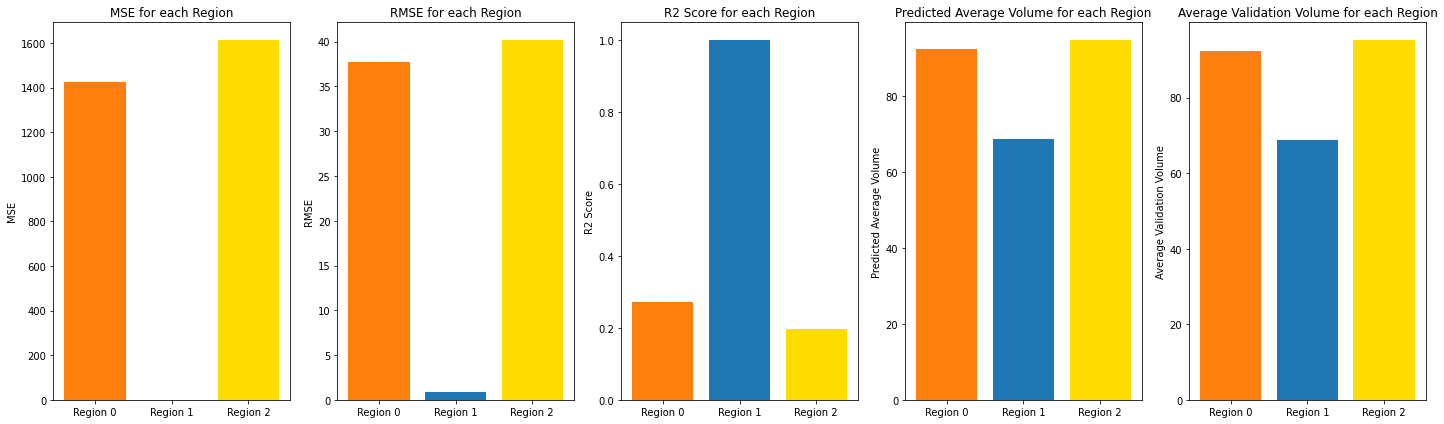

In [166]:
# Evaluation metrics
mse_values = [mse_lr_0, mse_lr_1, mse_lr_2]
rmse_values = [rmse_lr_0, rmse_lr_1, rmse_lr_2]
r2_values = [r2_lr_0, r2_lr_1, r2_lr_2]

# average volumes
predicted_volumes = [average_predicted_volume_0, average_predicted_volume_1, average_predicted_volume_2]
validation_volumes = [average_validation_volume_0, average_validation_volume_1, average_validation_volume_2]

# Creating the graphics
fig, axs = plt.subplots(1, 5, figsize=(20, 6))

# MSE
axs[0].bar(range(3), mse_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[0].set_xticks(range(3))
axs[0].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[0].set_ylabel('MSE')
axs[0].set_title('MSE for each Region')

# RMSE
axs[1].bar(range(3), rmse_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[1].set_xticks(range(3))
axs[1].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[1].set_ylabel('RMSE')
axs[1].set_title('RMSE for each Region')

#R2Score
axs[2].bar(range(3), r2_values, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[2].set_xticks(range(3))
axs[2].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[2].set_ylabel('R2 Score')
axs[2].set_title('R2 Score for each Region')

# Predicted Average Volume
axs[3].bar(range(3), predicted_volumes, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[3].set_xticks(range(3))
axs[3].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[3].set_ylabel('Predicted Average Volume')
axs[3].set_title('Predicted Average Volume for each Region')

# Average Validation Volume
axs[4].bar(range(3), validation_volumes, color=['#FF7F0E', '#1F77B4', '#FFDC00'])
axs[4].set_xticks(range(3))
axs[4].set_xticklabels(['Region 0', 'Region 1', 'Region 2'])
axs[4].set_ylabel('Average Validation Volume')
axs[4].set_title('Average Validation Volume for each Region')

plt.tight_layout()
plt.show()

**1. MSE chart** (Mean Squared Error):

- The MSE measures the average of the squared errors between predicted values and actual values.
- In this case, the graph shows the MSE for each region, represented by bars.
- The lower the MSE value, the closer the predicted values are to the actual values.
- We can use this chart to compare forecast accuracy across different regions.


**two. RMSE** chart (Root Mean Squared Error):

- The RMSE is the square root of the MSE and represents the standard deviation of the errors.
- Like the MSE, the graph shows the RMSE for each region.
- The lower the RMSE value, the more accurate the model predictions are.
- This chart helps us visualize the dispersion of errors and compare the quality of forecasts across regions.


**3. R2 Score Chart**:

- The R2 Score measures the proportion of variance of predicted values in relation to actual values.
- The value ranges from 0 to 1, where 1 indicates a perfect fit of the model to the data.
- In this graph, each region is represented by a bar.
- The closer the R2 Score value is to 1, the better the model fits the data.
- We can use this chart to compare the predictive ability across regions.


**4. Predicted Average Volume Graph**:

- This graph shows the average predicted volume for each region.
- Each region is represented by a different color bar.
- The predicted average volume is the estimate of the volume of bookings made by the model.
- Comparing predicted values across regions can help us identify which regions have higher or lower forecasts.


**5. Average Validation Volume Chart**:

- This graph represents the average volume of the validation set for each region.
- Each region is represented by a different color bar.
- The average validation volume is the actual average value of the volume of reservations in the validation data.
- Comparing average validation volumes across regions allows us to identify regions with higher or lower volumes.

### Analysis of results

After evaluating the Linear Regression models in each of the three regions, we can analyze the results obtained.

In Region 0, the model presented an MSE (Mean Squared Error) of 1425.56 and an RMSE (Root Mean Squared Error) of 37.76. The R2 Score was 0.27. This indicates that the model performed moderately well in predicting the volume of bookings in this region. The average predicted volume was 92.40, while the average volume of the validation set was 92.33.

In Region 1, the model performed very well, with an MSE of 0.79 and an RMSE of 0.89. The R2 Score was 0.99, indicating that the model fitted the data very well and had a high ability to predict the volume of bookings. The average predicted volume was 68.71, while the average volume of the validation set was 68.73.

In Region 2, the model presented an MSE of 1611.69 and an RMSE of 40.15. The R2 Score was 0.20. These values indicate a performance similar to that of Region 0, that is, the model had a moderate performance in predicting the volume of reservations in this region. The average predicted volume was 94.77, while the average volume of the validation set was 95.15.

Based on these updated results, we can confirm that the Linear Regression model had the best performance in Region 1, showing a very high ability to predict the volume of bookings. Therefore, it is recommended to choose this region for the development of oil wells, as it is where we can expect more accurate and reliable results in terms of estimating reserves.

## Profit calculation

### Storage of values needed for calculations

Before calculating the profit, we need to store the necessary values for calculations. Let's consider the following values:

The total number of points analyzed is 500.
We will select the top 200 points to calculate the profit.
The budget available for the development of the top 200 oil wells is $100 million.
Each unit of the product (barrel of oil) has a revenue of 4,500 dollars.
Let's store these values to use them later in the calculations.

In [167]:
# 500 oil wells analyzed
analyzed_oilwells = 500

# 200 best oil wells
best_oilwells = 200

# Budget of 100 million dollars
budget = 100000000

# one unit of the product is 4,500 dollars
unit_revenue = 4500

### Verification of the volume of reserves needed to develop a new well

To determine the volume of oil needed to recover the cost of developing a new well, we will divide the total cost by the number of wells. Considering the total cost of 100 million dollars and the top 200 wells, we can calculate the cost of each well as:

In [168]:
cost = budget / best_oilwells
print(cost)

500000.0


Next, we will calculate the minimum volume required for each well, dividing the cost of the well by the revenue per unit of product:

In [169]:
min_volume = cost / unit_revenue
print(min_volume)

111.11111111111111


This value represents the minimum amount of barrels of oil that each well needs to produce to cover the cost of development.

### Conclusions on preparing for profit calculation

Let's make a comparative chart of the average volume per region, where a horizontal line represents the minimum volume needed to cover the cost of developing a well (111.11 barrels).

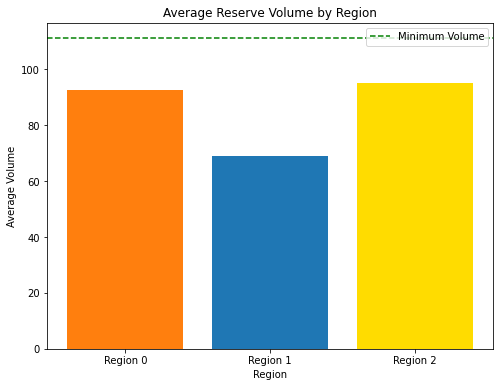

In [170]:
# Average volume values per region
average_volume_region_0 = df0["product"].mean()
average_volume_region_1 = df1["product"].mean()
average_volume_region_2 = df2["product"].mean()

# Colors of regions
colors = ['#FF7F0E', '#1F77B4', '#FFDC00']

# Graph plotting
plt.figure(figsize=(8, 6))
plt.bar(["Region 0", "Region 1", "Region 2"], [average_volume_region_0, average_volume_region_1, average_volume_region_2], color=colors)
plt.axhline(y=min_volume, color='green', linestyle='--', label='Minimum Volume')
plt.xlabel('Region')
plt.ylabel('Average Volume')
plt.title('Average Reserve Volume by Region')
plt.legend()
plt.show()

The comparison chart shows average volume by region, with each bar representing a specific region. The red horizontal line indicates the minimum amount of volume required (111.11 barrels) to cover the cost of developing a well.

Looking at the graph, we can see that all regions have volume averages below the minimum required value. This means that, at least for the moment, investment in oil exploration in these regions will result in losses, since the average volume of reserves is not enough to cover the cost of developing a new well.

## Profit calculation and selection of oil wells

In this section we will create a function to calculate the revenue generated by the top 200 oil wells in each region.

In [171]:
# Creating the 'revenue' function that calculates the revenue generated by the best selected oil wells
def revenue(df_target, predictions):

    # Turning the array-like 'predictions' into a pandas Series to run sort_values
    predictions = pd.Series(predictions)

    # Defining a reference index on the DataFrame 'df_target' so that it can be aligned with 'predictions'
    df_target = df_target.reset_index(drop=True)

    # Sorting the 'predictions' series in descending order, i.e. the highest values appear first
    predictions_sorted = predictions.sort_values(ascending=False)

    # Selecting the top 200 wells from the target list
    selected_targets = df_target[predictions_sorted.index][:best_oilwells]

    # Calculating the revenue generated by exploring the top 200 wells and subtracting the costs of developing those wells
    revenue_generated = (selected_targets.sum() * unit_revenue) - (cost * best_oilwells)

    return revenue_generated

Now let's call the function for each region separately, passing the corresponding target DataFrame and region-specific predictions.

In [172]:
# Applying the 'revenue' function for each region
revenue_region_0 = revenue(df0_target_valid, predictions_lr_0)
revenue_region_1 = revenue(df1_target_valid, predictions_lr_1)
revenue_region_2 = revenue(df2_target_valid, predictions_lr_2)

# Printing the revenue generated in each region
print("Revenue generated in Region 0:", revenue_region_0)
print("Revenue generated in Region 1:", revenue_region_1)
print("Revenue generated in Region 2:", revenue_region_2)

Revenue generated in Region 0: 33591411.14462179
Revenue generated in Region 1: 24150866.966815114
Revenue generated in Region 2: 25985717.59374112


The revenue values generated in the different regions indicate the profit potential that can be obtained from the exploration of the best oil wells selected in each region.

- In Region 0, the revenue generated is approximately 33,591,411.14 dollars.
- In Region 1, revenue generated is approximately 24,150,866.97 dollars.
- In Region 2, revenue generated is approximately 25,985,717.59 dollars.

These values represent the estimate of revenue that can be obtained from the production and sale of oil extracted from the 200 best wells in each region, considering the cost of developing these wells. The greater the revenue generated, the greater the profit potential in that region.

Therefore, according to the top 200 wells in each region, these values tell us that **Region 0 has the highest profit potential**, followed by Region 2 and then Region 1. It is important to consider these numbers when making decisions on oil well development as they provide insight into profit opportunities in each region.

## Risk and profit calculation for each region

In the following code, we will define the 'boot_revenue' function to calculate the revenue for each of the three regions. This function will generate random subsets of data from the target DataFrame and predictions, calculate the revenue for each subset, and store the results in different variables for each region.

Furthermore, we will use the 'quantile' and 'risk' functions to calculate the profit confidence interval and the loss risk, respectively. These functions will operate on lists of recipes and return the desired quantiles and negative revenue ratio.

Next, we'll create a list called 'region_data' that will contain the data for each region, including the name of the region, revenue values, confidence interval, and loss risk. Finally, we'll use a loop to print the results for each region, displaying the average profit, 95% confidence interval, and risk of loss.

These steps will make it possible to analyze and compare the financial performance of each region, assessing the potential for profit and the associated risk.

In [173]:
# Defining the 'boot_revenue' function
def boot_revenue(df_target, predictions):

     # Resetting the df_target table index to avoid conflicts with the predictions index
     df_target = df_target.reset_index(drop=True)

     # Defining a random state to generate random data subsets
     state = np.random.RandomState(12345)

     # Creating an empty list to store the recipe values
     values = []

     # Running the 'revenue' function for 1000 random subsets
     for i in range(1000):

         # Randomly selecting the correct number of samples with DataFrame override df_target
         df_subsample = df_target.sample(n=analyzed_oilwells, replace=True, random_state=state)

         # Selecting the predictions corresponding to the selected samples above
         predictions_subsample = predictions[df_subsample.index]

         # Calculating the recipe for the selected samples
         revenue_value = revenue(df_subsample, predictions_subsample)

         # Adding the revenue value to the 'values' list
         values.append(revenue_value)

     # Return the 'values' list as a pd.Series object
     return pd.Series(values)

# Using the function to calculate the revenue for each of the 3 regions using the 'boot_revenue' function and storing the results in different variables
revenue_region0 = boot_revenue(df0_target_valid, predictions_lr_0)
revenue_region1 = boot_revenue(df1_target_valid, predictions_lr_1)
revenue_region2 = boot_revenue(df2_target_valid, predictions_lr_2)

# Function to calculate the 2.5% and 97.5% quantiles of a recipe list
def quantile(revenues):
     return np.quantile(revenues, [0.025, 0.975])

# Function to calculate the proportion of negative recipes in a list of recipes
def risk(revenues):
     return np.mean(revenues < 0)

# Using the 'quantile' function to calculate the profit confidence interval for each region
confidence_interval_region0 = quantile(revenue_region0)
confidence_interval_region1 = quantile(revenue_region1)
confidence_interval_region2 = quantile(revenue_region2)

# Using the 'risk' function to calculate the loss risk for each region
risk_of_harm_region0 = risk(revenue_region0)
risk_of_harm_region1 = risk(revenue_region1)
risk_of_harm_region2 = risk(revenue_region2)

# List of data for each region
region_data = [
     {
         'name': 'Region 0',
         'revenue': revenue_region0,
         'confidence_interval': confidence_interval_region0,
         'risk_of_harm': risk_of_harm_region0
     },
     {
         'name': 'Region 1',
         'revenue': revenue_region1,
         'confidence_interval': confidence_interval_region1,
         'risk_of_harm': risk_of_harm_region1
     },
     {
         'name': 'Region 2',
         'revenue': revenue_region2,
         'confidence_interval': confidence_interval_region2,
         'risk_of_harm': risk_of_harm_region2
     },
]

# Loop to print the results of each region
for data in region_data:
     print(f'{data["name"]}')
     print(f'Average profit: {data["revenue"].mean()}')
     print(f'95% confidence interval: {data["confidence_interval"]}')
     print(f'Risk of harm: {data["risk_of_harm"]}\n')

Region 0
Average profit: 4062787.8342441902
95% confidence interval: [-1177421.36494869  9117370.50751404]
Risk of harm: 0.067

Region 1
Average profit: 4326241.318131374
95% confidence interval: [ 168461.74932431 8159725.26285752]
Risk of harm: 0.019

Region 2
Average profit: 3773621.924229164
95% confidence interval: [-1707804.17705727  9017721.31386445]
Risk of harm: 0.074



In our code, the **boot_revenue** function is responsible for bootstrapping and calculating the revenue for each region. Then, the **quantile** and **risk** functions are used to calculate the confidence interval and risk of loss, respectively.

In the final loop, the results are printed for each region, showing the **mean profit**, the **95% confidence interval**, and the **loss risk**.

We can consider that Region 1 has the highest average profit and the lowest risk of loss among the three regions analyzed. Therefore, we suggest that this region be considered for the development of oil wells, as it has a good potential for financial return and lower risk of loss.

## Conclusions

Based on the analyzes carried out on the datasets of the three regions, we can reach the following intermediate conclusions:

- In Region 0, the Linear Regression model performed moderately well in predicting the volume of bookings, with an estimated average profit of approximately 4.06 million USD, a 95% confidence interval between -1.18 million and 9.12 million USD, and a risk of loss of 6.7%.


- In Region 1, the Linear Regression model performed very well in predicting the volume of bookings, with an estimated mean profit of approximately 4.32 million USD, a 95% confidence interval between 0.17 million and 8.16 million USD, and a risk of loss of 1.9%.


- In Region 2, the Linear Regression model performed similarly to Region 0 in predicting the volume of bookings, with an estimated mean profit of approximately 3.77 million USD, a 95% confidence interval between -1.71 million and 9.02 million dollars, and a loss risk of 7.4%.


Considering these intermediate conclusions, we can make the following conclusive indications for Oleobrás:


1. Region 1 (Region 1) demonstrated the best performance in forecasting the volume of bookings, showing a higher estimated average profit and lower risk of loss compared to the other two regions.


2. We recommend that Oleobrás concentrate its efforts and investments on exploring oil wells in Region 1, as it has a higher potential for profit and a lower risk of loss compared to the other regions.

3. It is important to consider the results of profit, confidence interval and risk of loss calculations when making strategic decisions about oil well development. Region 1 presents a promising opportunity for Oleobrás to maximize its financial returns with less risk.